# Part I - (Student performance in exams)
## by (Abdulazeez Ijaoba)

## Introduction
This dataset is about 1000 student's marks and their performance on different subject. The dataset consist of 8 columns:
  
  *  gender
  *  race/ethnicity
  *  parental levels of education
  *  lunch
  *  test preparation course
  *  math score
  *  reading score
  *  writing score


## Preliminary Wrangling
This documents explores a dataset containing the marks of 1000 students in various subjects.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load the datset into notebook
exams = pd.read_csv('exams.csv')
exams.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [3]:
# get the shape, datatypes, info of dataset
exams.shape
exams.info()
exams.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [104]:
#check decriptive status of our data
exams.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [4]:
#changing column headers using rename to make exploration easier
exam= exams.rename(columns = {"race/ethnicity":"race_ethnicity","parental level of education":"parent_education","test preparation course":"test_preparation_course","math score":"math_score","reading score":"reading_score","writing score":"writing_score"})

In [5]:
exam.head(5)

,gender,race_ethnicity,parent_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


> Lets convert the object variables to categorical variables so it would easier to arrange them during exploration

In [6]:
# convert gender, race/ethnicity, parental level of education, lunch, test preparation course into ordered categorical types
ordinal_var_dict = {'gender': ['male', 'female'],
                    'race_ethnicity': ['group C', 'group D', 'group B', 'group E', 'group A'],
                    'lunch': ['standard' , 'free/reduced'], 
                    'test_preparation_course': ['none', 'completed']}
                  
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    exam[var] = exam[var].astype(ordered_var)

> Now lets get the total score of all scores and put it in a new column called total mark

In [7]:
# creating new a new column and including the total scores
exam['Total_mark'] = exam['math_score'] + exam['reading_score'] + exam['writing_score']
print(exam)
exam.head(10)

     gender race_ethnicity    parent_education         lunch  \
0      male        group A         high school      standard   
1    female        group D    some high school  free/reduced   
2      male        group E        some college  free/reduced   
3      male        group B         high school      standard   
4      male        group E  associate's degree      standard   
..      ...            ...                 ...           ...   
995    male        group C         high school      standard   
996    male        group D  associate's degree  free/reduced   
997  female        group C    some high school  free/reduced   
998  female        group C        some college      standard   
999    male        group A        some college      standard   

    test_preparation_course  math_score  reading_score  writing_score  \
0                 completed          67             67             63   
1                      none          40             59             55   
2           

,gender,race_ethnicity,parent_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_mark
0,male,group A,high school,standard,completed,67,67,63,197
1,female,group D,some high school,free/reduced,none,40,59,55,154
2,male,group E,some college,free/reduced,none,59,60,50,169
3,male,group B,high school,standard,none,77,78,68,223
4,male,group E,associate's degree,standard,completed,78,73,68,219
5,female,group D,high school,standard,none,63,77,76,216
6,female,group A,bachelor's degree,standard,none,62,59,63,184
7,male,group E,some college,standard,completed,93,88,84,265
8,male,group D,high school,standard,none,63,56,65,184
9,male,group C,some college,free/reduced,none,47,42,45,134


In [100]:
exam.describe()

,math_score,reading_score,writing_score,Total_mark
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000,203.136000
std,15.402871,14.737272,15.600985,43.542732
min,13.000000,27.000000,23.000000,65.000000
25%,56.000000,60.000000,58.000000,175.750000
50%,66.500000,70.000000,68.000000,202.000000
75%,77.000000,79.000000,79.000000,235.000000
max,100.000000,100.000000,100.000000,300.000000


### What is the structure of your dataset?

> There are 1000 students in this dataset with 8 variables which are ( gender, race, parent's level of education, lunch, test preparation course, math score, reading score, writing score). only 3 variales are numeric, while the rest are ordered variables with different levels

*  gender ( male , female)
*  race/ethnicity( group C, group D, group B, group E, group A)
*  lunch ( standard, free/reduced)
*  test preparation course(none, completed)
*  parental level of education(some college, associate deree, bachelor degree, master degree, some high school, high school)

### What is/are the main feature(s) of interest in your dataset?

> i am interested in finding out what gender performed excellently well

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> i believe the test preparation course really has an impact on their performance but other features such as  gender, race/ethnicity and parent education can also determine it but to what extent?

## Univariate Exploration



 > lets start by looking at the distribution of the student's performance using the total mark

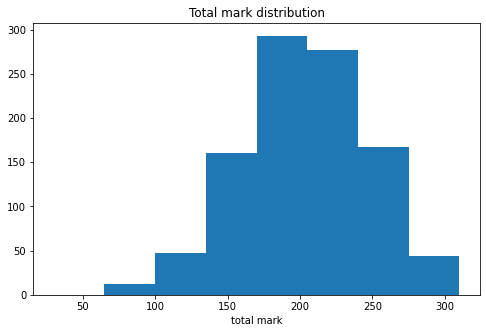

In [8]:
# we will use a histogram to show the distribution of the total mark

binsize = 35
bins = np.arange(30, exam['Total_mark'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = exam, x = 'Total_mark', bins = bins)
plt.xlabel('total mark')
plt.title('Total mark distribution')
plt.show()

> we can see that majority of the mark rise above average, few are below average and just two long peaks are between above 150 and 250.
Now lets set a pass mark of 150 and see the number of students that passed and failed

In [9]:
passmark = 150  #150 is the passmark

In [10]:
#checking the total count for both pass and failed students
exam['Pass_status'] = np.where(exam['Total_mark'] < passmark, 'Fail', 'Pass')
pass_count= exam.Pass_status.value_counts()
pass_count

Pass    876
Fail    124
Name: Pass_status, dtype: int64

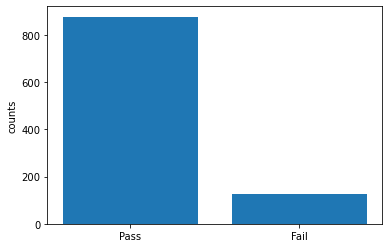

In [11]:
#using barchart to visualize the distribution of the pass status
x= exam['Pass_status'].unique()
y = exam['Pass_status'].value_counts()
plt.bar(x,y)
plt.ylabel('counts');

 > we can see that the number number of students that passed is far gretaer than the ones that failed. so we can conclude that very few students failed in this exam. 
 Now lets look at the distribution of other interested features we stated earlier

In [12]:
# we will check the distributions using a bar plot for the categorical varaibles

def bar_plot(variable):

    var = exam[variable]
    
    varValue = var.value_counts()
    

    plt.figure(figsize =(5,5))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values,rotation=45)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

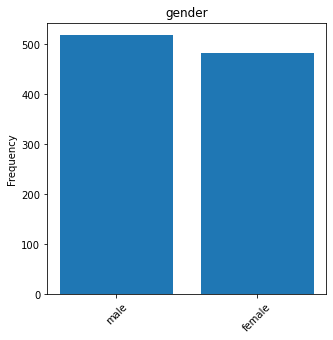

gender: 
 male      517
female    483
Name: gender, dtype: int64


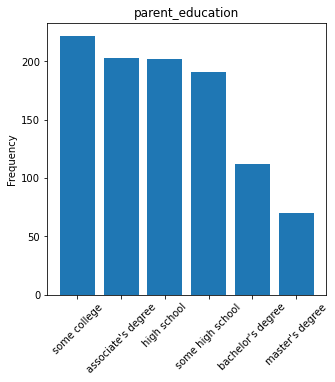

parent_education: 
 some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: parent_education, dtype: int64


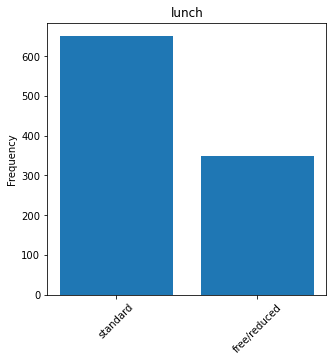

lunch: 
 standard        652
free/reduced    348
Name: lunch, dtype: int64


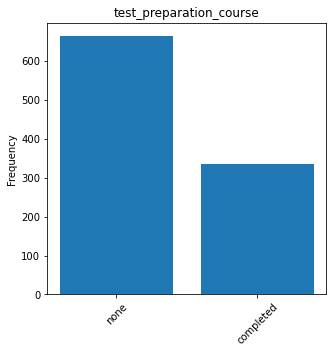

test_preparation_course: 
 none         665
completed    335
Name: test_preparation_course, dtype: int64


In [13]:
category1 = ["gender","parent_education","lunch","test_preparation_course"]

for c in category1:
    
    bar_plot(c)

> we can see that most student come from race of group C, more people had, standard lunch, we had more males compared to females and majority of students parent went to soome college education level.
Now lets look at the distribution acorss all student scores

Text(0.5, 0.98, 'gender distribution')

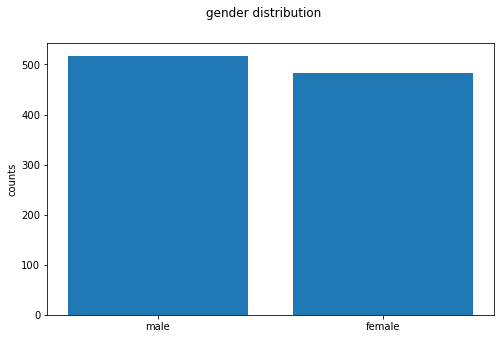

In [14]:
# lets look at only the gender distribution differently
x= exam['gender'].unique()
y = exam['gender'].value_counts()
plt.figure(figsize =[8,5])
plt.bar(x,y)
plt.ylabel('counts')
plt.suptitle('gender distribution')

> we can see that the ratio of male to female is almost the same just some difference but still, there are more male students than female

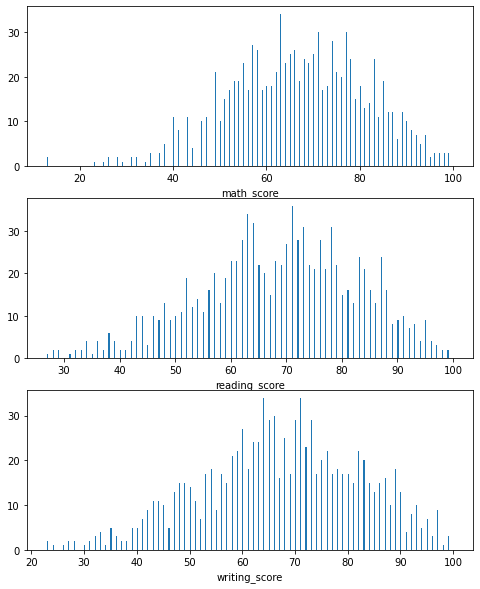

In [15]:
# lets look at histograms of individual scores

fig, ax = plt.subplots(nrows=3, figsize = [8,10])

variables = ['math_score', 'reading_score', 'writing_score']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(exam[var]), max(exam[var])+0.2, 0.2)
    ax[i].hist(data = exam, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))

plt.show()

> we can see that majority of the high peaked bars fall in between score of 60 and 80 in the different category of scores.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> i had to calculate the total marks and categorize it based on those that passed and fail. The distribution showed that 876 students pass the exam and 124 of them failed. The distruntion of scores showed how alot of students performed well in the exam, the ratio of pass to fail is so wide.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> in the test prepation course, majority of the students didnt participate and the number of students who passed were still high. Does that mean that it doesnt determine the pass or fail level of the student? Also, majority of parents education level was 'some college' too. does it also determine the students performance. these are worthy questions to tackle in this exploration. we will cover these in relationships between variables.

## Bivariate Exploration


In [16]:
# First we will start with relationships between all scores
numeric =['math_score', 'reading_score', 'writing_score', 'Total_mark']
categorical =['gender','race_ethnicity', 'parent_education', 'test_preparation_course', 'lunch']


exam.shape= (1000, 10)
exam_samp.shape= (700, 10)


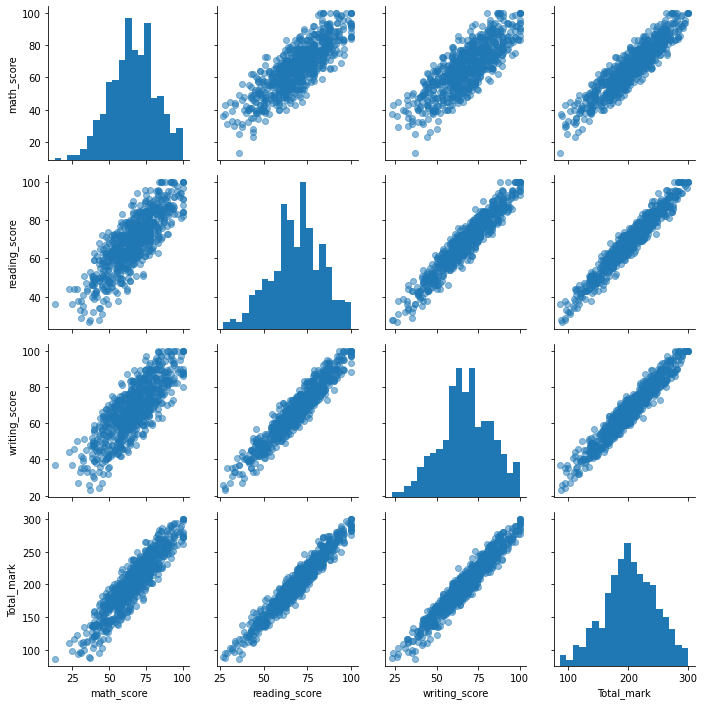

In [17]:
print("exam.shape=",exam.shape)
exam_samp = exam.sample(n=700, replace = False)
print("exam_samp.shape=",exam_samp.shape)

g = sb.PairGrid(data = exam_samp, vars = numeric)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter, alpha = 0.5);

> All the correlation between math, reading and writing scores are high. The correlation between maths score and both reading and writing score seem to be wider in some sense.This shows how the performance of all the students varies.

> Now lets explore more categories and numeric variables to see the relationship within them

Text(0.5, 1.0, 'total mark and gender')

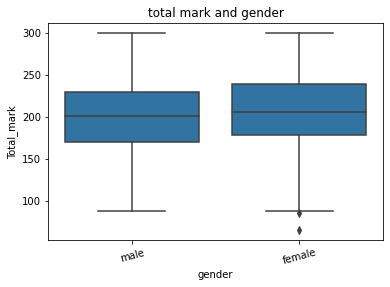

In [18]:
# starting with relationship between the total mark and the gender
base_color = sb.color_palette()[0]
sb.boxplot(data=exam, x = 'gender', y ='Total_mark', color=base_color )
plt.xticks(rotation = 15)
plt.title('total mark and gender')

> we can see that more females performed well than the males with averages falling above 200 even though there are more males than females.
> Now lets see the gender that passed and failed,

Text(0.5, 1.0, 'pass status between genders')

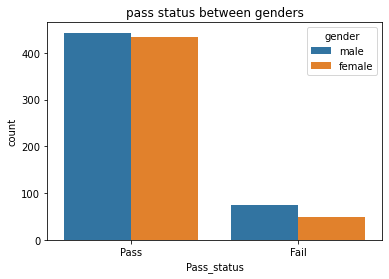

In [214]:
sb.countplot(data = exam, x='Pass_status', hue = 'gender')
plt.title('pass status between genders')

> we can see that even though females got high marks than males,in this plot, male failed compared to female. but the males also slight passed too. but since the proportion of failed is low compared to males, it means fenale performed well 

Text(0.5, 1.0, 'total mark and test preparation course')

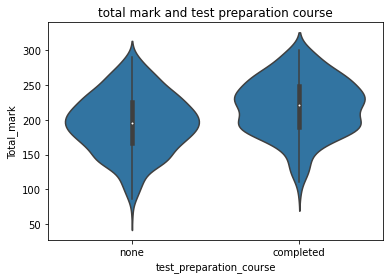

In [215]:
# we will check if the relationship of the test_preparation_ course made students pass more
#using violinplots
sb.violinplot(data = exam, x ='test_preparation_course', y = 'Total_mark', color= base_color)
plt.title('total mark and test preparation course')

> this plot shows that people who completed their test_prepparation got high marks than those who didnt. this clearly shows that the test_preparation course was really effective

Text(0.5, 1.0, 'test prepartion between genders')

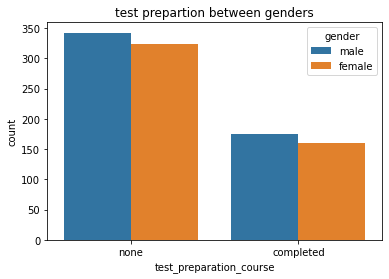

In [217]:
# lets look at relationships between other categorical variables like the gender, test_preparation_course, race
# lets look at relatiohips between gender and test preparation course.

sb.countplot(data = exam, x='test_preparation_course', hue = 'gender')
plt.title('test prepartion between genders')

> we can see that the number of males and females who completed the test is low compared to those that didnt complete it.
 >  In our previous exploration, people that completed the test and passed is much.  

Text(0.5, 1.0, 'the impact of lunch on total mark')

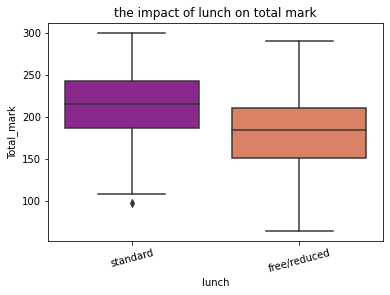

In [218]:
# lets see the lunch that has the highest mark in the data
# making use of boxplot
sb.boxplot(x = 'lunch', y ='Total_mark', data= exam, palette='plasma' )
plt.xticks(rotation = 15)
plt.title('the impact of lunch on total mark')

> we can see that people who took standard lunch had high marks than those who didnt. An average of students who took standard meals had total scores above 200. Males had more standard lunch than the females, but the female still out performaed them in the exam. so it is evident that the provision for the lunch had no impact on their performance.

Text(0.5, 1.0, 'parents education influence on total mark')

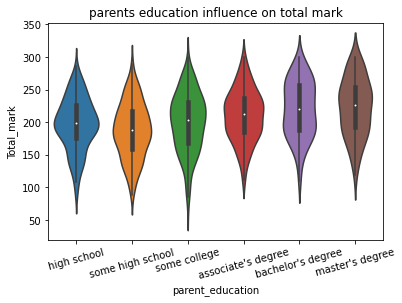

In [219]:
# lets explore relationships between parents education to see if it has any relationship to the students performance

sb.violinplot(data = exam, x= 'parent_education', y = 'Total_mark')
plt.xticks(rotation =15)
plt.title('parents education influence on total mark')

> this answers our question. so we can see that students whose parent have masters and bachelors degree performed better than the rest. so even if we have more parents with some college degrees it doesnt mean they have students with the highest marks.

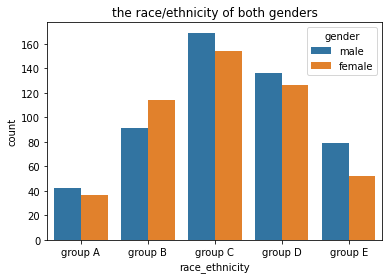

In [64]:
# lets also look at the relatioship between gender and race if it impacted theri performance too
sb.countplot(data= exam, x = 'race_ethnicity', hue ='gender', order = ['group A', 'group B', 'group C', 'group D', 'group E'])
plt.title('the race/ethnicity of both genders');

> we can see that majority of the students came from race groupC.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> in our exploration between these relationships, the individual scores has a positive relationship between themselcves and te total mark, meaning they all contributed to the total marks equally, secondly, we see that more female performed well than the males even though we had more males than females in the exam, and also more males completed the test_preparation_course.
Thirdly, children whose parent has bachelor and master degree has more passed more. so we shouldnt judge by the quantity

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> firstly, in the relationship between the genders and test preparation course,more males completed the test compared to the females but the females still passed more in the overall test. secondly the relationship between the genders and lunch, males had more standard lunch that the females but in this relationship, the females still performed better. it means the females are good in general co pared to the males.  

## Multivariate Exploration


> lets look at the relationship between gender, the three exam scores and test_preparation course

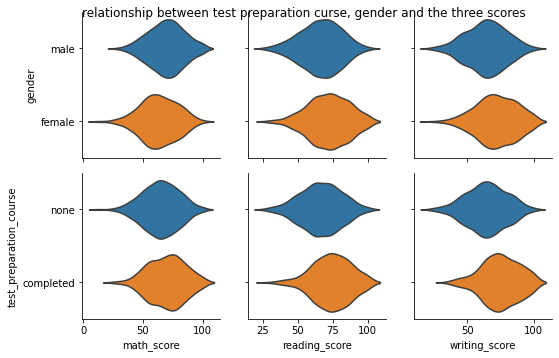

<Figure size 1008x576 with 0 Axes>

In [67]:
# using pairgrid to visualize the scores and and its relatioship with gender and test_preparation_course
g =sb.PairGrid(data= exam, x_vars=['math_score', 'reading_score', 'writing_score'], y_vars= ['gender', 'test_preparation_course'])
g.map(sb.violinplot, inner = None)
plt.suptitle('relationship between test preparation curse, gender and the three scores')
plt.figure(figsize =[14,8]);

> in this exploration, there is nothing really interesting but it seems peple that completed their test course had above the average score than those that didnt

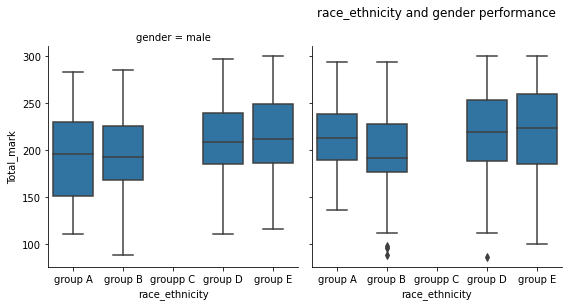

In [19]:
# lets look at the gender in each race_ethnicity and their performance

g= sb.FacetGrid(data = exam, col = 'gender',height = 4)
g.map(sb.boxplot, 'race_ethnicity', 'Total_mark', order= ['group A', 'group B', 'groupp C', 'group D', 'group E'])
plt.title('race_ethnicity and gender performance', pad = 30);


> in this exploration, we can see that the males and females in group E performed well, but males had higher marks than the females. but majority of females in group D in terms of median score did better than the male. so based on race_ethnicity, we can se that males performed well than the females.

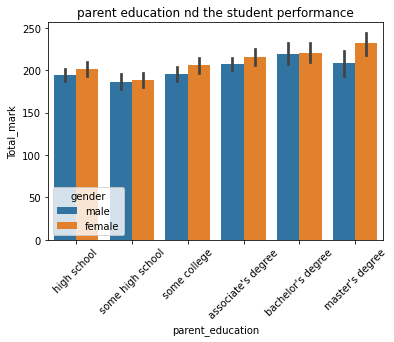

In [117]:
#lets look at the gender that performaled well baed on their parents education 

ax = sb.barplot(data = exam, x = 'parent_education', y = 'Total_mark', hue ='gender', dodge = 0.5 , )
plt.xticks(rotation = 45)
plt.title('parent education nd the student performance');

> we can see in this plot that the parents with bachelors degree and masters degree have the highest well performed students. but the males for the parents with masters degree seem quite low, while the female did excellently well. Based on this gender comparism, we can now conclude that females performed far better than males.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> in the multivariate exploration, the parents education has a positive impact on both genders performance. Based on ethnicity in group E, males performed better than the females.

### Were there any interesting or surprising interactions between features?

> if we conclude with the quantity of people in each categories, that would be a wrong conclusion. it is observed that females performed well in all exams than the males in both parents education and ethnicity, but based on some other features, the males performed well too. The first plot umder the multivariate plot doesnt really hold anything interesting.

## Conclusions

> Using the total mark as a yardstick to conclude on the students performance, we can conclude that:
    
   * Females performed perfectly than the males in this exam
   *  The race_ethnicity showed that students in groupC but group E performed well than other groups
   *  Alot of students didnt partake in the test_prepration course but those who completed the test course passed more.
   *  Students whose parent went to some college where much in the exam but those students whose parents have bachelor and masters degree passed more. So this is an indicator that the parents educational level as an impact on the students performance too.
    